# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susuman
Processing Record 2 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | novhorodka
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | sijunjung
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | fort mcmurray
Processi

In [5]:
###TEST###
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
shity_url = f'{url}q={city}&appid={weather_api_key}'
response = requests.get(shity_url)
print("Status code: ", response.status_code)
print("Response text: ", response.text)

Status code:  200
Response text:  {"coord":{"lon":-0.1257,"lat":51.5085},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":283.21,"feels_like":282.73,"temp_min":282.29,"temp_max":284.01,"pressure":979,"humidity":94},"visibility":10000,"wind":{"speed":1.54,"deg":200},"clouds":{"all":75},"dt":1707523660,"sys":{"type":2,"id":2075535,"country":"GB","sunrise":1707549904,"sunset":1707584670},"timezone":0,"id":2643743,"name":"London","cod":200}


In [6]:
###TEST###
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "london"
shity_url = f'{url}q={city}&appid={weather_api_key}'
shity_weather = requests.get(shity_url).json()
shity_weather


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 283.21,
  'feels_like': 282.73,
  'temp_min': 282.29,
  'temp_max': 284.01,
  'pressure': 979,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1707523660,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1707549904,
  'sunset': 1707584670},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [7]:
###TEST###
city_lat = shity_weather['coord']['lat']
city_lng = shity_weather['coord']['lon']
city_max_temp = shity_weather['main']['temp_max']
print(city_lat,city_lng,city_max_temp)

51.5085 -0.1257 284.01


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [9]:
# Display sample data
city_data_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,susuman,62.7833,148.1667,239.25,99,100,0.89,RU,1707523721
1,adamstown,-25.0660,-130.1015,298.44,90,100,10.85,PN,1707523722
2,wailua homesteads,22.0669,-159.3780,298.59,69,40,4.63,US,1707523722
3,port mathurin,-19.6833,63.4167,299.88,79,94,11.91,MU,1707523722
4,iqaluit,63.7506,-68.5145,241.09,86,13,3.54,CA,1707523723
5,west island,-12.1568,96.8225,301.14,78,59,5.14,CC,1707523528
6,novhorodka,48.3651,32.6578,276.28,96,100,2.93,UA,1707523723
7,port-aux-francais,-49.3500,70.2167,281.07,96,76,13.33,TF,1707523723
8,karratha,-20.7377,116.8463,306.40,42,3,4.18,AU,1707523723
9,port elizabeth,-33.9180,25.5701,292.09,79,44,1.79,ZA,1707523724


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,239.25,99,100,0.89,RU,1707523721
1,adamstown,-25.0660,-130.1015,298.44,90,100,10.85,PN,1707523722
2,wailua homesteads,22.0669,-159.3780,298.59,69,40,4.63,US,1707523722
3,port mathurin,-19.6833,63.4167,299.88,79,94,11.91,MU,1707523722
4,iqaluit,63.7506,-68.5145,241.09,86,13,3.54,CA,1707523723


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

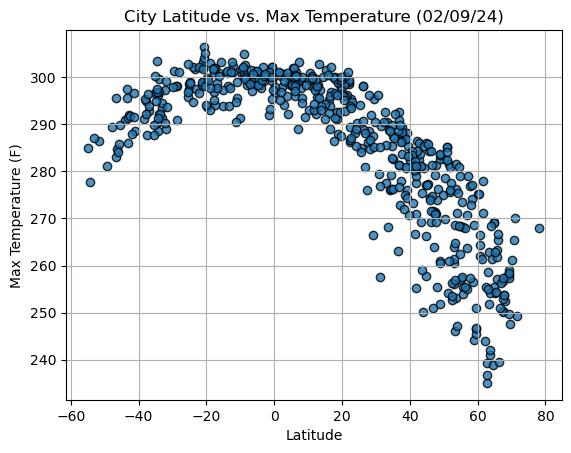

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],[city_data_df["Max Temp"]],edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

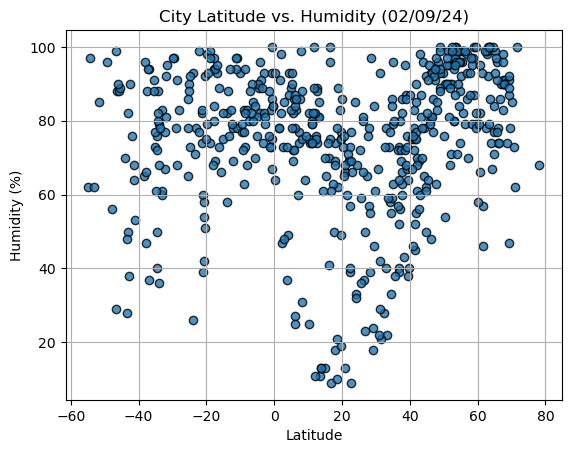

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

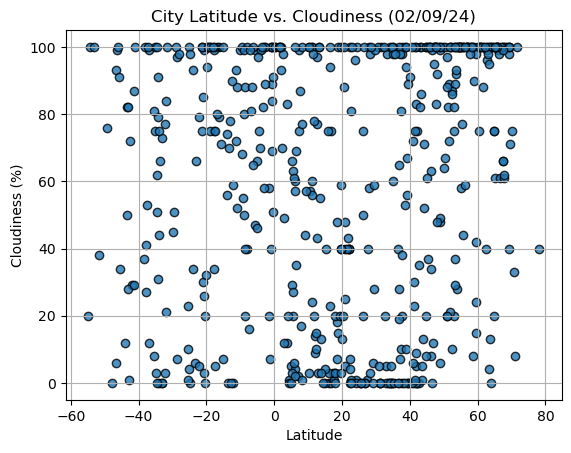

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

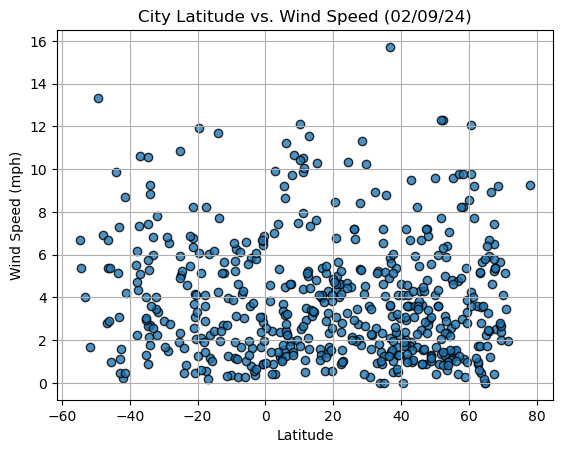

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # Run regression 
    regress_values = x_values * slope + intercept # Calculate the regression values
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # Define the line equation to display on the chart
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(f'The line equation is: {line_eq}')
    print(f'The correlation coefficient is: {round(rvalue, 3)}')
    print(f'The p-value is: {round(pvalue, 3)}')
    print(f'The standard error is: {round(stderr, 3)}')
    



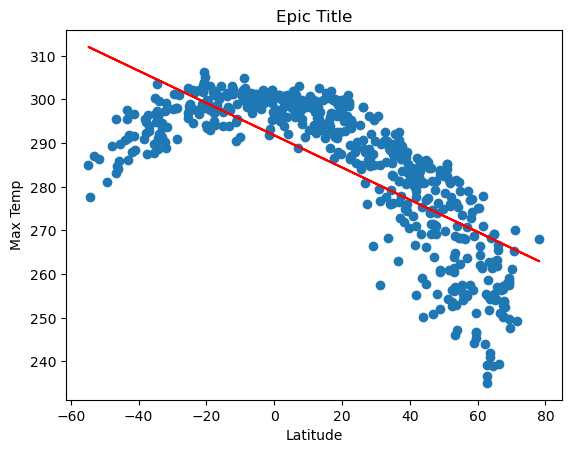

The line equation is: y = -0.37x + 291.81


In [62]:
###Template for plot_linear_regression###
# Define the variables 
x_values = # Call your x-axis data
y_values = # Call your y-axis data
x_label = # Create the x-axis label
y_label = # Create the y-axis label
title = # Create an epic title

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
print(f'there are {len(northern_hemi_df)} cities in the northern hemisphere')
northern_hemi_df.head()

there are 377 cities in the northern hemisphere


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,239.25,99,100,0.89,RU,1707523721
2,wailua homesteads,22.0669,-159.3780,298.59,69,40,4.63,US,1707523722
4,iqaluit,63.7506,-68.5145,241.09,86,13,3.54,CA,1707523723
6,novhorodka,48.3651,32.6578,276.28,96,100,2.93,UA,1707523723
10,petropavlovsk-kamchatsky,53.0452,158.6483,260.48,80,75,5.00,RU,1707523724


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
print(f'there are {len(southern_hemi_df)} cities in the southern hemisphere')
southern_hemi_df.head()



there are 163 cities in the southern hemisphere


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,298.44,90,100,10.85,PN,1707523722
3,port mathurin,-19.6833,63.4167,299.88,79,94,11.91,MU,1707523722
5,west island,-12.1568,96.8225,301.14,78,59,5.14,CC,1707523528
7,port-aux-francais,-49.3500,70.2167,281.07,96,76,13.33,TF,1707523723
8,karratha,-20.7377,116.8463,306.40,42,3,4.18,AU,1707523723


###  Temperature vs. Latitude Linear Regression Plot

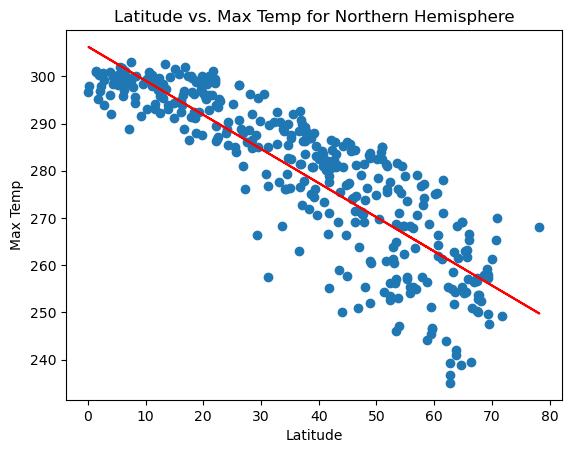

The line equation is: y = -0.72x + 306.29
The correlation coefficient is: -0.864
The p-value is: 0.0
The standard error is: 0.022


In [79]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs. Max Temp for Northern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)


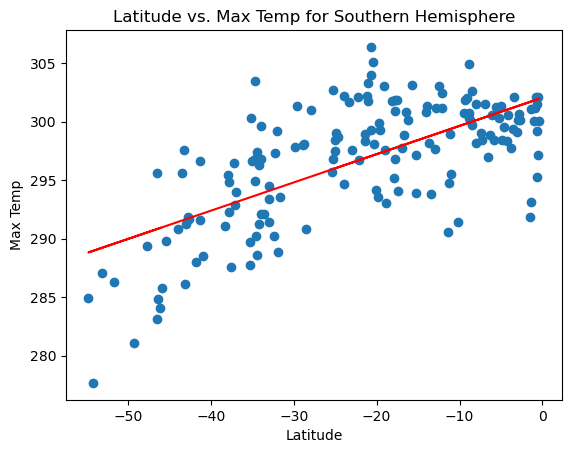

The line equation is: y = 0.24x + 302.06
The correlation coefficient is: 0.67
The p-value is: 0.0
The standard error is: 0.02


In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs. Max Temp for Southern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)


**Discussion about the linear relationship:** These graphs have the opposite relationship which is quite interesting. What it shows that that as you get closer to the equater (0) you get a higher max temp. This clearly shows that its hotter at the equater, colder away from the equater. Makes sense that the north and south poles are ice lands. 

### Humidity vs. Latitude Linear Regression Plot

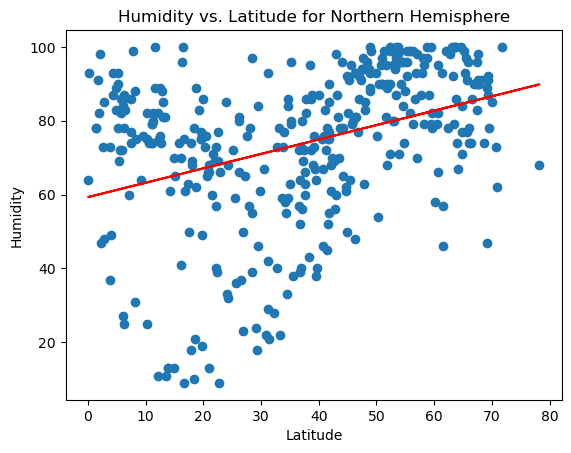

The line equation is: y = 0.39x + 59.32
The correlation coefficient is: 0.365
The p-value is: 0.0
The standard error is: 0.051


In [82]:
# Northern Hemisphere
# Define the variables 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Humidity vs. Latitude for Northern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)

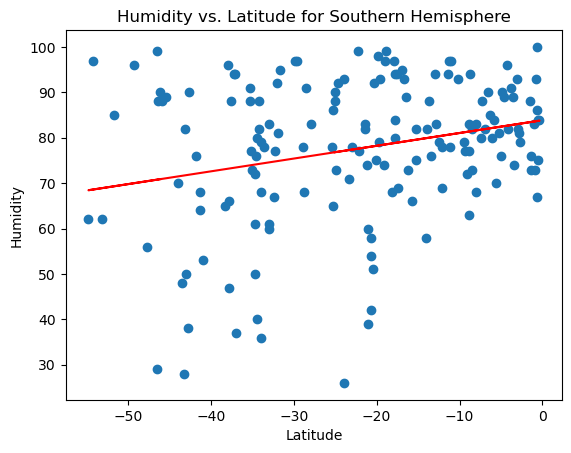

The line equation is: y = 0.28x + 83.85
The correlation coefficient is: 0.258
The p-value is: 0.001
The standard error is: 0.083


In [89]:
# Southern Hemisphere
# Define the variables 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Humidity vs. Latitude for Southern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** Both graphs have the same relationship, as latitude increases so does humitity. This makes it really confusing beacause as you move away from the equater in the northern half, it gets more humid, but as you move towards the equater in the southern half it also gets more humid. I think the key stats to look at here are rvalues, or corelation coeffients. They're both very weak, implying there is no relationship between humidity and latitude. Humidity has nothing to do with the equater. 

### Cloudiness vs. Latitude Linear Regression Plot

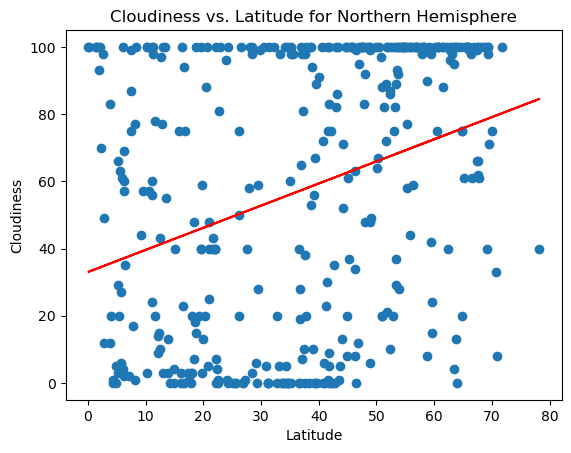

The line equation is: y = 0.66x + 33.0
The correlation coefficient is: 0.326
The p-value is: 0.0
The standard error is: 0.099


In [83]:
# Northern Hemisphere
###Template for plot_linear_regression###
# Define the variables 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Cloudiness vs. Latitude for Northern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)

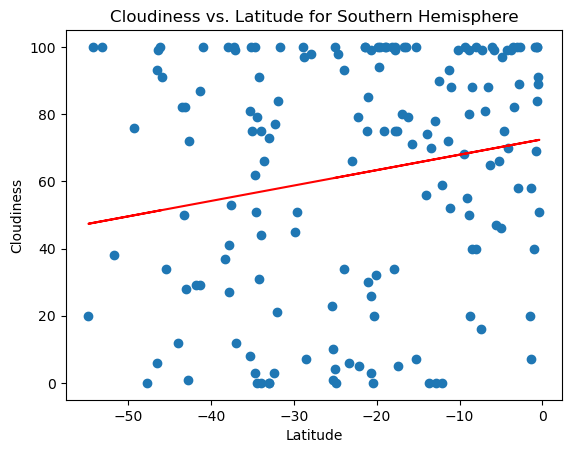

The line equation is: y = 0.46x + 72.51
The correlation coefficient is: 0.189
The p-value is: 0.016
The standard error is: 0.188


In [87]:
# Southern Hemisphere
###Template for plot_linear_regression###
# Define the variables 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Cloudiness vs. Latitude for Southern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** This seems to me like the same situation as the last question. There does not seem to be any relationship between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

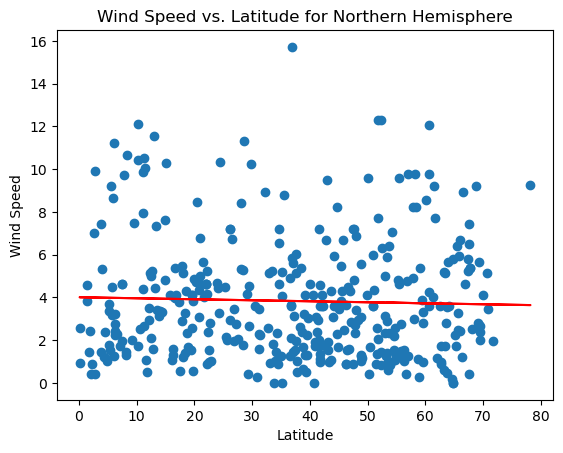

The line equation is: y = -0.0x + 4.01
The correlation coefficient is: -0.033
The p-value is: 0.518
The standard error is: 0.007


In [85]:
# Northern Hemisphere
###Template for plot_linear_regression###
# Define the variables 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Wind Speed vs. Latitude for Northern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)

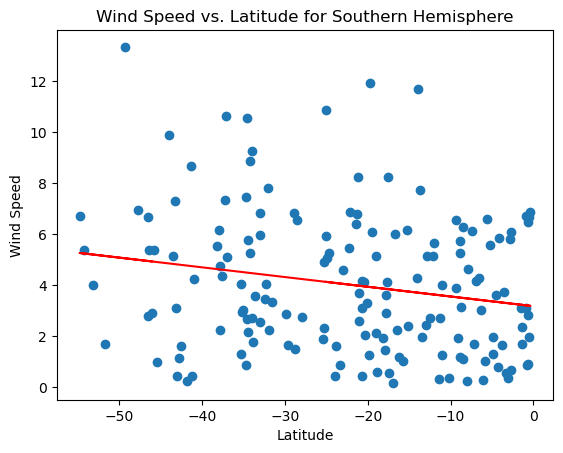

The line equation is: y = -0.04x + 3.17
The correlation coefficient is: -0.203
The p-value is: 0.009
The standard error is: 0.014


In [86]:
# Southern Hemisphere
###Template for plot_linear_regression###
# Define the variables 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Wind Speed vs. Latitude for Southern Hemisphere'

# Call regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** We have very weak correlation coefficients here too. I don't see any strong correlations between wind speed and latitude. 